In [1]:
import sys
import pandas as pd
import numpy as np


In [2]:
sys.path.append("../")


In [3]:
import biobss

In [4]:
import neurokit2 as nk
sample_data=pd.read_pickle("..\sample_data\\EDA_Chest.pkl")
sample_data=sample_data.flatten()

In [5]:
decompose=biobss.pipeline.Bio_Process(process_method=biobss.edatools.eda_decompose,modality="EDA",sigtype="EDA",method="highpass")
normalize=biobss.pipeline.Bio_Process(process_method=biobss.signaltools.normalize_signal,modality="EDA",sigtype="EDA")
resample=biobss.pipeline.Bio_Process(process_method=biobss.signaltools.resample_signal_object,modality="EDA",sigtype="EDA",target_sample_rate=350)
signal_features=biobss.pipeline.Feature(name="signal_features",function=biobss.edatools.signal_features.get_signal_features,parameters={"modality":"EDA","sigtype":"EDA"},input_signals=['EDA_Tonic','EDA_Phasic'])
stat_features=biobss.pipeline.Feature(name="stat_features",function=biobss.common.stat_features.get_stat_features,parameters={"modality":"EDA","sigtype":"EDA"},input_signals=['EDA_Raw','EDA_Tonic','EDA_Phasic'])

In [6]:
pipe=biobss.pipeline.Bio_Pipeline(modality="EDA",sigtype="EDA",windowed_process=True,window_size=60,step_size=30,features_list=[signal_features])

In [7]:
pipe.preprocess_queue.add_process(normalize)
pipe.process_queue.add_process(decompose)
pipe.process_queue.add_process(resample)
pipe.add_feature_step(signal_features)
pipe.add_feature_step(stat_features)

In [8]:
pipe.set_input(sample_data,700,name="EDA_Raw",modality="EDA")

In [9]:
pipe.input

Signal object with 1 channel(s)
EDA_Raw (EDA) (700Hz) ((5920.0,)s) (1 windows) ((4144000,))

In [10]:
pipe.run_pipeline()

c:\Users\Cagatay\Desktop\Workspace\Biobss Pipeline\biobss\examples\..\biobss\pipeline\bio_process.py:54: UserWarning: Vectorized method failed. Trying scalar method. It may be significantly slower.
  warnings.warn(


In [14]:
pipe.input

Signal object with 5 channel(s)
EDA_Raw (EDA) (350Hz) (60.0s) (196 windows) ((196, 21000))
EDA_Tonic (EDA) (350Hz) (60.0s) (196 windows) ((196, 21000))
EDA_Phasic (EDA) (350Hz) (60.0s) (196 windows) ((196, 21000))

In [15]:
pipe.extract_features()

In [16]:
pipe.features

,EDA_Tonic_rms,EDA_Tonic_acr_length,EDA_Tonic_integral,EDA_Tonic_average_power,EDA_Phasic_rms,EDA_Phasic_acr_length,EDA_Phasic_integral,EDA_Phasic_average_power,EDA_Tonic_rms,EDA_Tonic_acr_length,...,EDA_Tonic_skew,EDA_Tonic_momentum,EDA_Phasic_mean,EDA_Phasic_std,EDA_Phasic_max,EDA_Phasic_min,EDA_Phasic_range,EDA_Phasic_kurtosis,EDA_Phasic_skew,EDA_Phasic_momentum
0.0,1.292249,20999.000079,27065.715066,1.669907,0.101395,21000.046325,961.108888,0.010281,1.292249,20999.000079,...,3.105139,0.008789,-0.021792,0.099026,0.143974,-0.733686,0.877660,12.159153,-3.342178,0.009806
30.0,1.197004,20999.000007,25017.396175,1.432819,0.029967,20999.689644,409.156997,0.000898,1.197004,20999.000007,...,-0.244369,0.013613,-0.000335,0.029965,0.152175,-0.103792,0.255967,2.901149,0.731742,0.000898
60.0,1.125761,20999.000004,23618.475020,1.267338,0.023702,20999.745202,361.882630,0.000562,1.125761,20999.000004,...,-1.014698,0.002412,-0.000806,0.023688,0.131624,-0.085715,0.217339,2.674562,1.229103,0.000561
90.0,1.268807,20999.000004,26547.240463,1.609870,0.015151,20999.838570,225.166714,0.000230,1.268807,20999.000004,...,0.133598,0.011784,-0.000406,0.015145,0.087735,-0.132645,0.220380,3.717007,0.755183,0.000229
120.0,1.404001,20999.000001,29466.105649,1.971219,0.007474,20999.755146,120.275030,0.000056,1.404001,20999.000001,...,0.825754,0.002395,-0.000109,0.007473,0.057750,-0.133986,0.191736,8.835741,-0.116584,0.000056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730.0,0.891403,20999.000000,18718.423878,0.794599,0.007764,20999.227492,131.390453,0.000060,0.891403,20999.000000,...,0.522635,0.000088,-0.000333,0.007757,0.056169,-0.070608,0.126777,0.973170,0.248118,0.000060
5760.0,0.896708,20999.000000,18830.112050,0.804086,0.007615,20999.279066,126.417252,0.000058,0.896708,20999.000000,...,-0.242186,0.000065,0.000040,0.007615,0.064727,-0.092185,0.156912,2.797143,0.116986,0.000058
5790.0,0.890937,20999.000000,18708.676687,0.793769,0.007336,20999.287003,119.768914,0.000054,0.890937,20999.000000,...,-0.158556,0.000086,0.000375,0.007326,0.065436,-0.090587,0.156023,3.702048,0.229558,0.000054
5820.0,0.913437,20999.000003,19147.592121,0.834367,0.012173,20999.235623,186.146864,0.000148,0.913437,20999.000003,...,1.681596,0.003006,-0.000190,0.012172,0.059596,-0.084778,0.144374,1.502358,-0.392279,0.000148


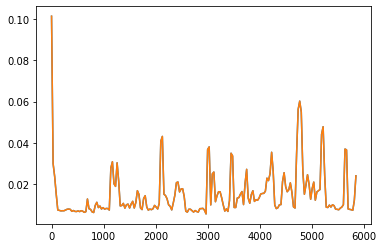

In [17]:
import matplotlib.pyplot as plt
plt.plot(pipe.features['EDA_Phasic_rms'])